<img src="header.png" align="left"/>

# Exercise Analysis and quality control of data (10 points) 

The goal of this exercise is to get an overview of typical basic data analysis steps.

- Datatypes and shapes of data
- Prints of data
- Missing values
- Basic statistics
- Outliers
- Correlations between features


Code and background taken from:

- [https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
- [https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
- [https://github.com/Viveckh/HiPlotTutorial/blob/master/Hiplot-Tutorial.ipynb](https://github.com/Viveckh/HiPlotTutorial/blob/master/Hiplot-Tutorial.ipynb)

# Import of python modules

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import hiplot as hip

from scipy import stats
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN

from keras.datasets import mnist
from keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
#
# Turn of some warnings
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)

#
# Einstellen der Grösse von Diagrammen
#
plt.rcParams['figure.figsize'] = [16, 9]

# Datatypes and shapes of data

https://numpy.org/devdocs/user/basics.types.html

<img src="info.png" align="left"/> 

In [3]:
# 
# Load some data
# 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv('data/iris/iris_mutilated.csv', names=names)

In [4]:
#
# Print shape of data
#
print(iris.shape)

(153, 5)


In [5]:
#
# Task: interpret those numbers in a short statement. (1 points)
# Hint: write your interpretation into your notebook in a MARKDOWN field.

### Antwort: 
Die Dimension des Datensatzes (x,y) x: Zeilen (features + labels), y: Spalten ( samples )

In [6]:
#
# Print datatypes
#
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  153 non-null    float64
 1   sepal-width   153 non-null    float64
 2   petal-length  152 non-null    float64
 3   petal-width   151 non-null    float64
 4   class         153 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB
None


# Print data

In [7]:
#
# Print head samples to see some data
#
print(iris.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.0          0.2  Iris-setosa
1           4.9          3.0           NaN          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [8]:
#
# Task: describe what a NaN is (1 points)
#

### Antwort: 
Not a Number -> das Feld ist nicht als Nummer interpretiertbar zB.: 2d.34

In [9]:
print(iris.tail())

     sepal-length  sepal-width  petal-length  petal-width           class
148           6.7          3.0           5.2          2.3  Iris-virginica
149           6.3          2.5           5.0          1.9  Iris-virginica
150           6.5          3.0           5.2          2.0  Iris-virginica
151           6.2          3.4           5.4          2.3  Iris-virginica
152           5.9          3.0           5.1          1.8  Iris-virginica


# Missing data

In [10]:
#
# Print all rows with invalid data.
# Task: explain the function of this statement (2 points)
# 
iris[iris.isna().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class
1,4.9,3.0,NaN,0.2,Iris-setosa
108,7.6,3.0,6.6,NaN,Iris-virginica
109,4.9,2.5,4.5,NaN,Iris-virginica


### Antwort: 
`isna` transformiert die dataframe Einträge zu True wenn sie keine Werte sind ( NaN, null, fehlend, ... ). `.any(axis=1)` lieftert dann alle indexes wo in irgendeiner Zeile ein Eintrag True ist ( dafür das axis=1 -> column ). das komplette Ergebnis ist also alle Zeileneinträge die einen fehlenden Wert in irgendeiner spalte besitzen.

In [11]:
#
# Print some statistical measures
#
iris.mean()

sepal-length    5.820915
sepal-width     3.056863
petal-length    3.728947
petal-width     1.169536
dtype: float64

In [12]:
#
# Replace missing values by mean value of feature
#
iris_non = iris.fillna(iris.mean())

In [13]:
iris_non[iris_non.isna().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class


Filling the invalid data elements with the mean value may create disturbances. An alternative way to handle missing data would be to delete the complete row.

# Duplicates

In [30]:
#
# Test data for duplicates and remove them
# Task: explain this code (2 points)
#
iris_non[iris_non.duplicated(keep=False)]

,sepal-length,sepal-width,petal-length,petal-width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
30,4.7,3.2,1.6,0.2,Iris-setosa
31,4.7,3.2,1.6,0.2,Iris-setosa
32,4.7,3.2,1.6,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
40,4.9,3.1,1.5,0.1,Iris-setosa
104,5.8,2.7,5.1,1.9,Iris-virginica
145,5.8,2.7,5.1,1.9,Iris-virginica


### Antwort: liefert alle Einträge von iris_non, die doppelt sind.
`iris_none[__INDEXES__]` gibt alle Einträge der Liste aus deren Index in dem Array ist
`.duplicated(kepp=FALSE)` markiert alle doppelten Einträge als "True" -> somit sind alle Einträge die duplicated sind als true, diese werden dann mit `[]` dargestellt

keep False bedeutet dass alle selben Werte als Duplikat gewertet werden: https://www.geeksforgeeks.org/python-pandas-dataframe-duplicated/

Kurz gesagt: alle doppelten Werte im Array werden ausgegeben ( bei z.B. True würde nur der erste Wert als Nicht-Duplikat anerkannt -> somit weniger Einträge ) 

# Simple statistics

In [15]:
#
# Distribution of class labels
#
print(iris_non.groupby('class').size())

class
Iris-setosa        53
Iris-versicolor    50
Iris-virginica     50
dtype: int64


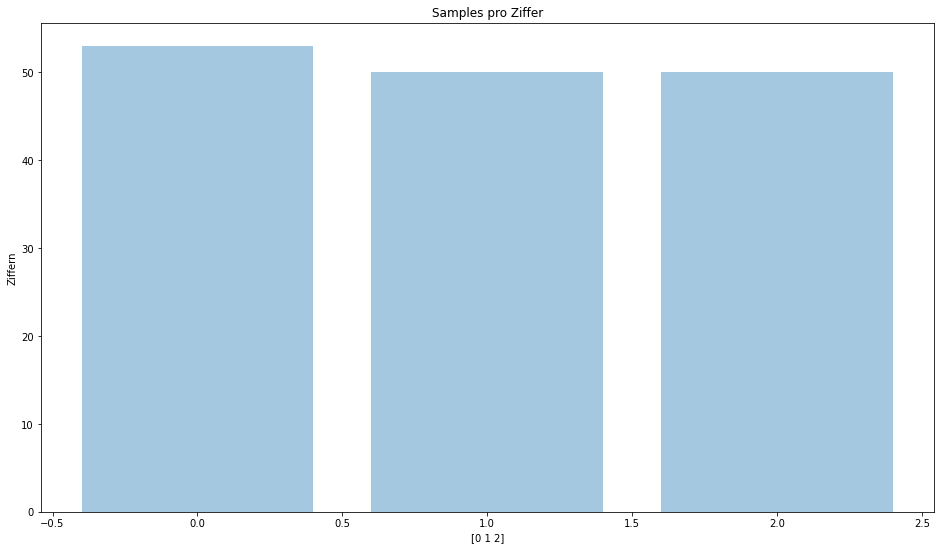

In [16]:
#
# Histogram of class distribution 
#
df = pd.DataFrame(iris_non,columns=['class'])
counts= df.groupby('class').size()
class_pos = np.arange(3)
plt.bar(class_pos, counts, align='center', alpha=0.4)
plt.xlabel(class_pos)
plt.ylabel('Ziffern')
plt.title('Samples pro Ziffer')
plt.show()

In [17]:
#
# Distribution of values in columns (features)
#
iris_non.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,153.000000,153.000000,153.000000,153.000000
mean,5.820915,3.056863,3.728947,1.169536
std,0.835137,0.429774,1.766264,0.763389
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Outliers in the data

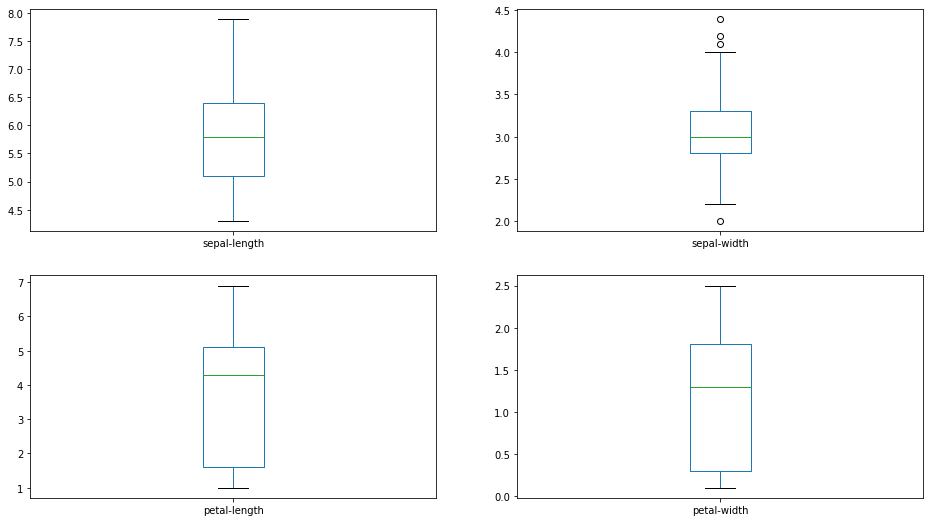

In [18]:
#
# Boxplots of features (outliers)
# Task: spot the outliers in the boxplots and describe the feature and the value range of the outliers (2 points)
#
iris_non.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### Antwort:
Outliers gibt es nur bei sepal-width. Die value-range für die outliers liegt  `> ~4.0` UND `< ~2.25`.


# Correlations between features

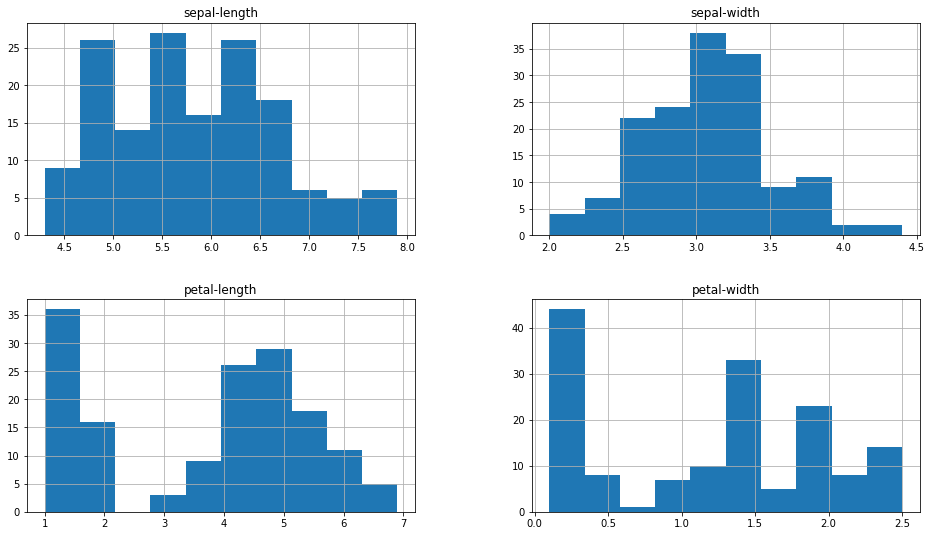

In [19]:
#
# Distribution of values per feature
#
iris_non.hist()
plt.show()

In [20]:
#
# Calculation of correlation facture between features
#
iris_non.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.116247,0.870525,0.817397
sepal-width,-0.116247,1.000000,-0.426164,-0.354123
petal-length,0.870525,-0.426164,1.000000,0.949181
petal-width,0.817397,-0.354123,0.949181,1.000000


<AxesSubplot:>

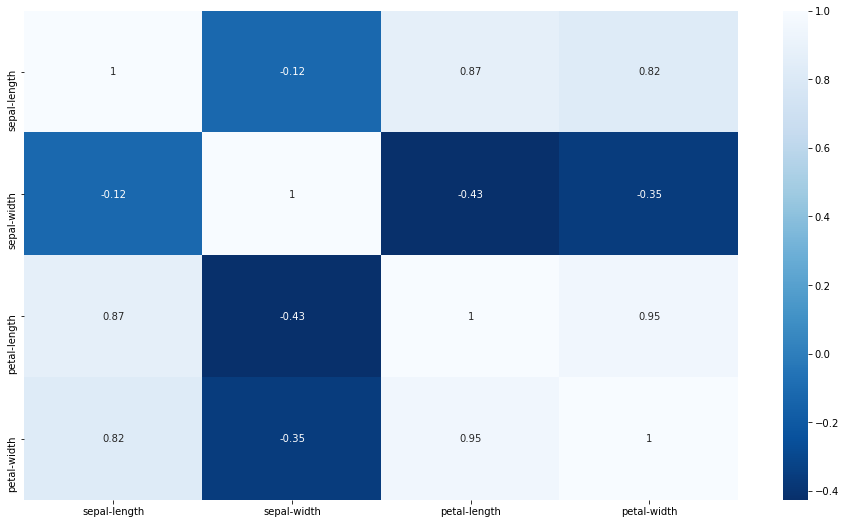

In [21]:
#
# Visual presentation of correlation between features
#
sns.heatmap(iris_non.corr(),annot=True,cmap='Blues_r')

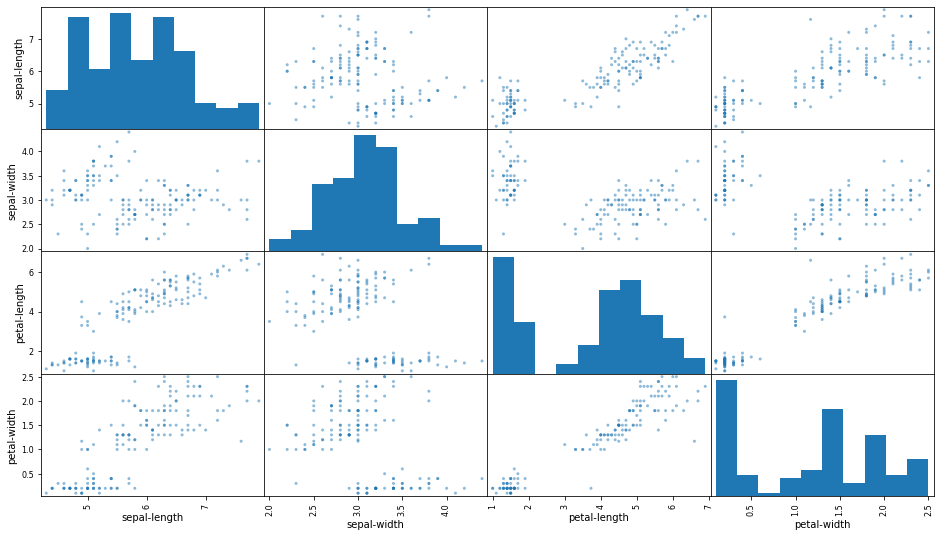

In [22]:
#
# Visualization as pair plot (scatter matrix)
#
scatter_matrix(iris_non)
plt.show()

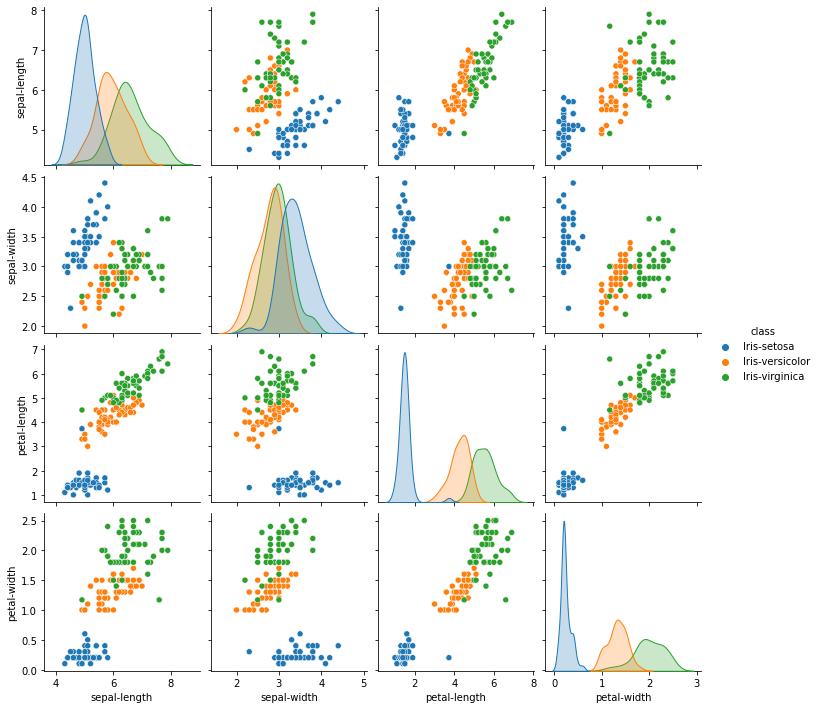

In [23]:
#
# Advanced pair plot (seaborn library) now including the class of each data point
# Task: what do you think? Which of the three classes are separable (2 points)
#
sns.pairplot(iris_non,hue='class')

In [24]:
#
# Very advanced form of visualization of relations between features
#

In [25]:
iris_data = iris_non.to_dict('records')
iris_data[:2]

[{'sepal-length': 5.1,
  'sepal-width': 3.5,
  'petal-length': 1.0,
  'petal-width': 0.2,
  'class': 'Iris-setosa'},
 {'sepal-length': 4.9,
  'sepal-width': 3.0,
  'petal-length': 3.728947368421053,
  'petal-width': 0.2,
  'class': 'Iris-setosa'}]

In [26]:
hip.Experiment.from_iterable(iris_data).display()

<IPython.core.display.Javascript object>